
# Result Analysis on VGGNet

In [1]:
import pandas as pd
import numpy as np

import dataset
import evaluate
import metric
import util
import visualize
import vggnet16

Using TensorFlow backend.


## Training

Let's train a model that takes in all body parts first.
The model use a 16 layer VGGNet with 3 colour channels. All weights are randomly initialized. It uses Adom optimizer with 
    beta_1=0.9, beta_2=0.999, epsilon=None, decay=0, amsgrad=False

Image perturbation includes:
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=30,
    fill_mode="constant",
    cval=0,
    horizontal_flip=True
    
All images are resized to 224*224 px

In [2]:
# Training Configurations
bpart = "all"
grayscale = True

In [3]:
history, model_path, result_path = vggnet.train(batch_size=32, learning_rate=0.00001, epochs=2, bpart=bpart, grayscale=grayscale)

****** Building Model
****** Preparing Input
****** Preparing Training Image Generator
****** Loading Validation Inputs
****** Starting Training: 16-47-14
Epoch 1/2
 - 675s - loss: 0.6694 - binary_accuracy: 0.5935 - batch_recall: 0.0245 - global_recall: 0.0252 - global_kappa: 0.0048 - val_loss: 0.6870 - val_binary_accuracy: 0.5211 - val_batch_recall: 0.0000e+00 - val_global_recall: 0.0000e+00 - val_global_kappa: -6.2659e-04
Epoch 2/2
 - 448s - loss: 0.6572 - binary_accuracy: 0.5981 - batch_recall: 0.1119 - global_recall: 0.1116 - global_kappa: 0.0455 - val_loss: 0.6735 - val_binary_accuracy: 0.5705 - val_batch_recall: 0.1511 - val_global_recall: 0.2869 - val_global_kappa: 0.1198
****** Training time: 0:18:58.394284
****** Saving Model
****** Writing Predictions


#### Training history

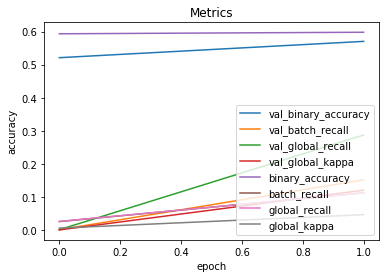

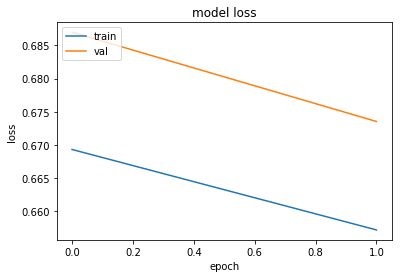

In [4]:
visualize.plot_history(history)

### Metrics

In [5]:
val_df = pd.read_csv(result_path)
evaluate.evl_result(val_df)

****** Evaluation per Image
Accuracy:  0.5705348764466688
Recall:    0.2869281045751634
Precision: 0.608876560332871
Kappa:     0.12037745278884333
Contingency Table:
  439            282
 1091           1385
Number of Inputs: 3197
****** Evaluation per Study Using Highest Score
Accuracy:  0.5888240200166805
Recall:    0.4200743494423792
Precision: 0.5552825552825553
Kappa:     0.14963682686373486
Contingency Table:
  226            181
  312            480
Number of Inputs: 1199
****** Evaluation per Study Using Lowest Score
Accuracy:  0.5613010842368641
Recall:    0.07992565055762081
Precision: 0.581081081081081
Kappa:     0.03590842663307668
Contingency Table:
   43             31
  495            630
Number of Inputs: 1199
****** Evaluation per Study Using Average Score
Accuracy:  0.5746455379482902
Recall:    0.18401486988847585
Precision: 0.5823529411764706
Kappa:     0.08180824419044636
Contingency Table:
   99             71
  439            590
Number of Inputs: 1199


Both averaging or picking the max prediction score from each image of the same study achieves the better overall result. Apperantly having more images helps the model determing whether there is an abnormal.

Interestingly, averaging the prediction score from each image of the same study achieves the best kappa. It does make sense however compare to the other aggregation, since averaging does not favor false positive or false negative.

#### Let's look at each body part

In [6]:
for g, df in val_df.groupby(val_df["body_part"]):
    print("****** Evaluation per body part: {} ******".format(g))
    evaluate.evl_result(df)
    print("\n\n")

****** Evaluation per body part: elbow ******
****** Evaluation per Image
Accuracy:  0.5978494623655914
Recall:    0.4782608695652174
Precision: 0.6214689265536724
Kappa:     0.19362915565447214
Contingency Table:
  110             67
  120            168
Number of Inputs: 465
****** Evaluation per Study Using Highest Score
Accuracy:  0.6139240506329114
Recall:    0.6515151515151515
Precision: 0.5308641975308642
Kappa:     0.23105153981171214
Contingency Table:
   43             38
   23             54
Number of Inputs: 158
****** Evaluation per Study Using Lowest Score
Accuracy:  0.5949367088607594
Recall:    0.13636363636363635
Precision: 0.5625
Kappa:     0.06750276650682398
Contingency Table:
    9              7
   57             85
Number of Inputs: 158
****** Evaluation per Study Using Average Score
Accuracy:  0.6329113924050633
Recall:    0.42424242424242425
Precision: 0.5833333333333334
Kappa:     0.21514217197670432
Contingency Table:
   28             20
   38             72

## Visualization

#### Attention

In [7]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

Populating the interactive namespace from numpy and matplotlib


d:\code\mura\env\lib\site-packages\keras\models.py:282: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


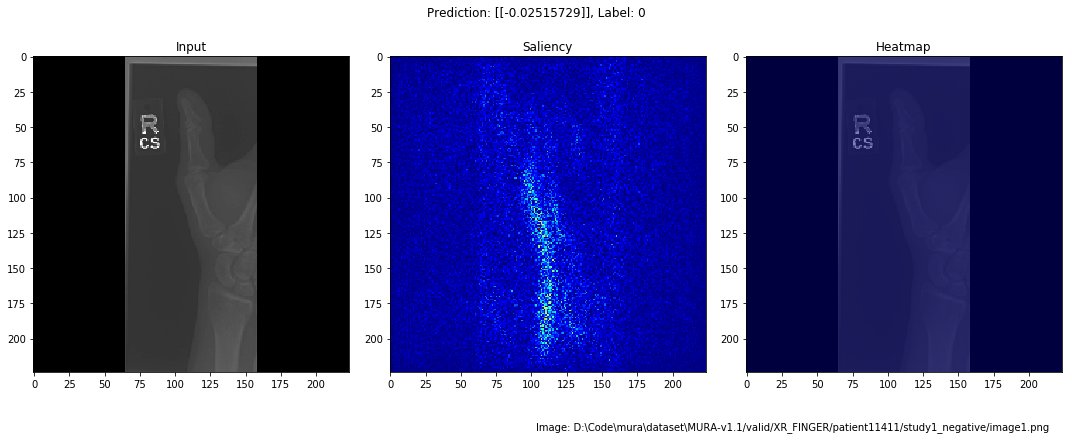

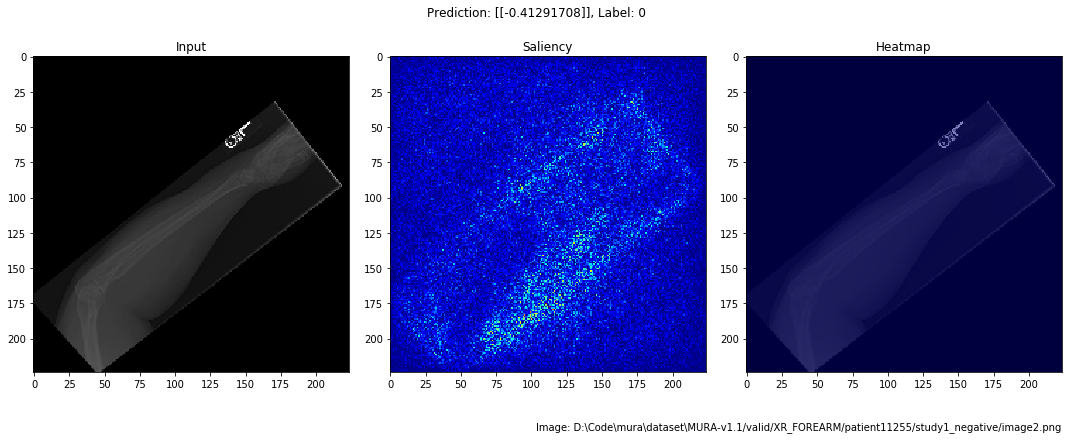

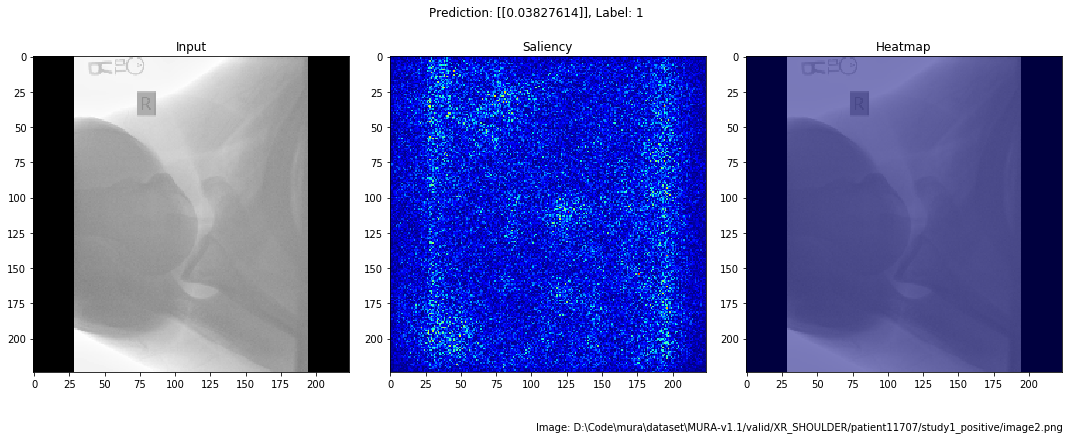

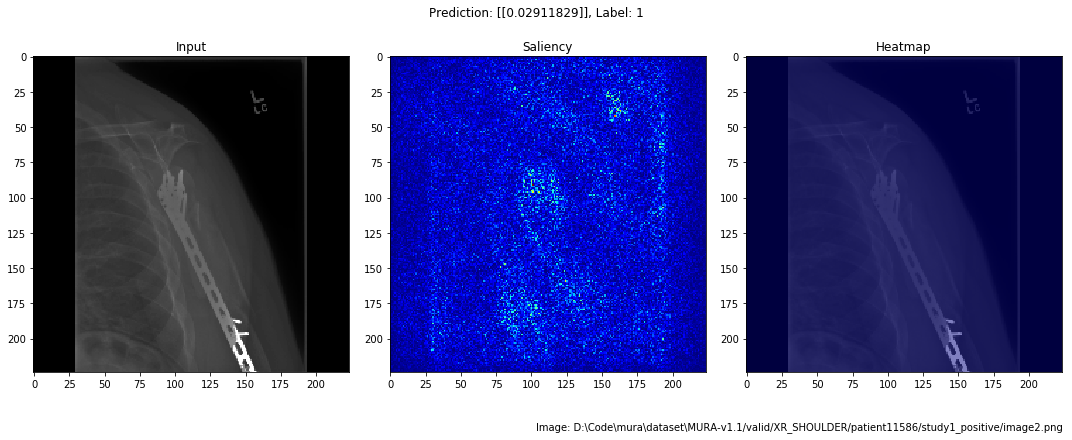

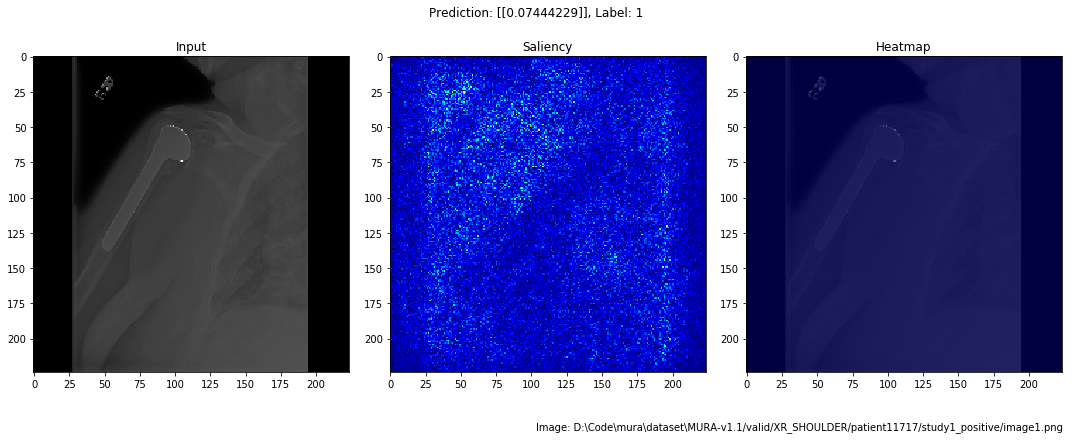

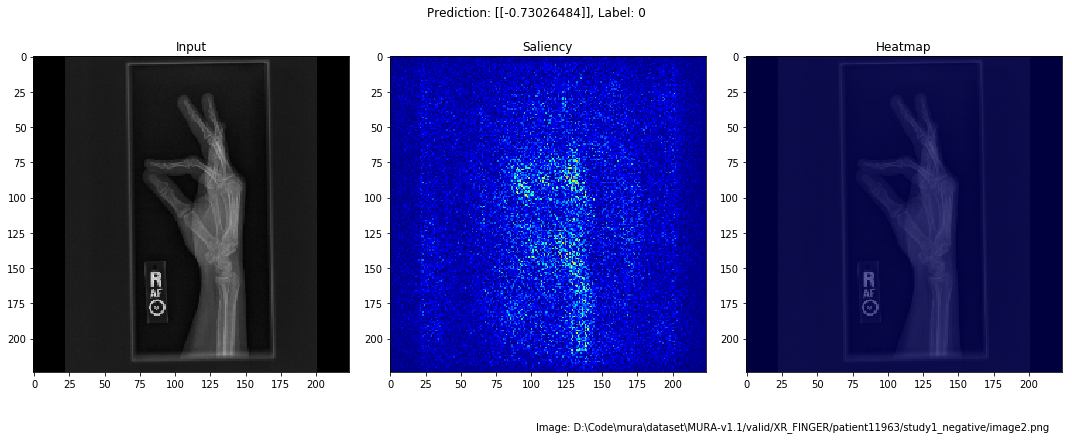

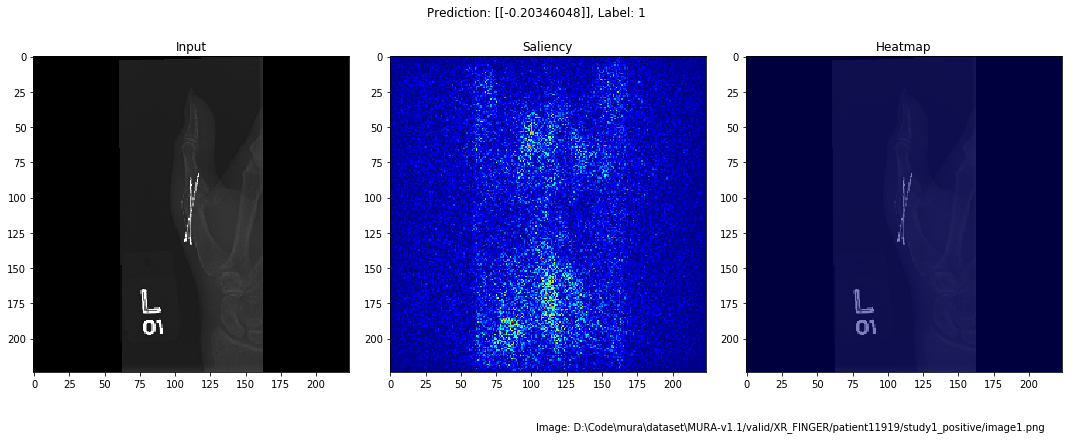

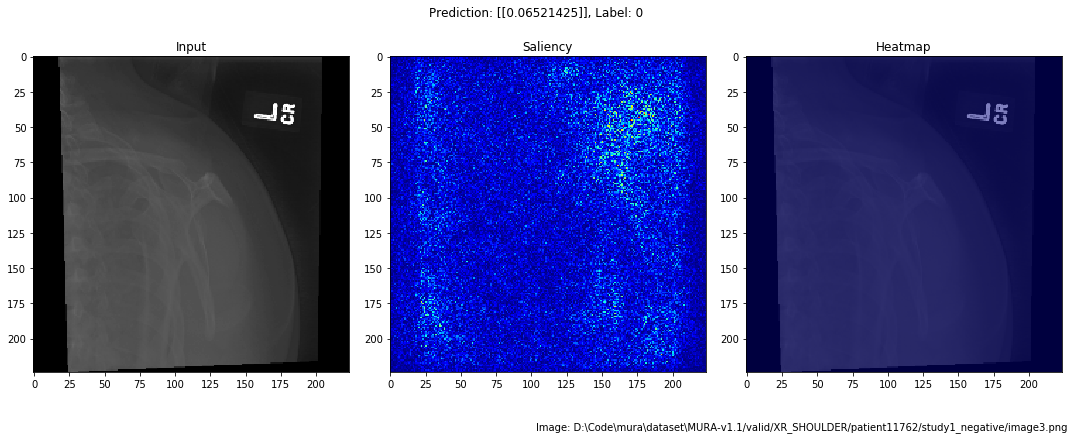

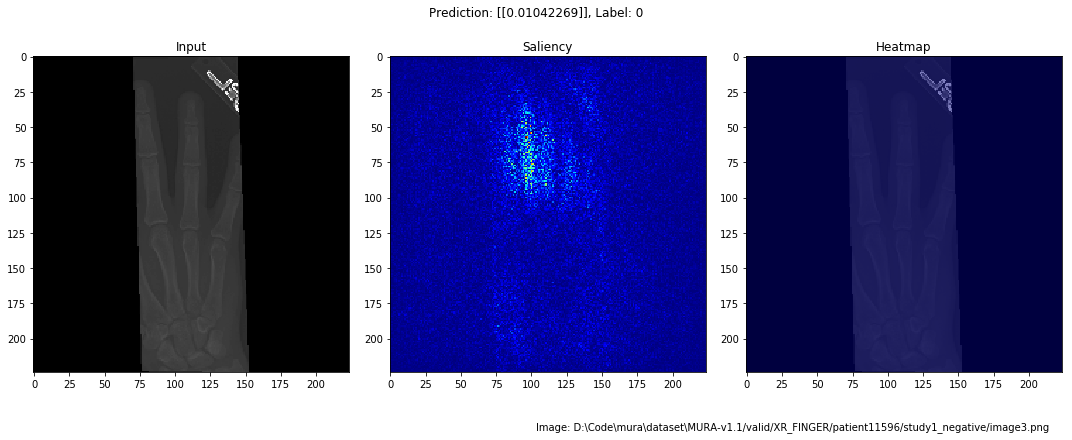

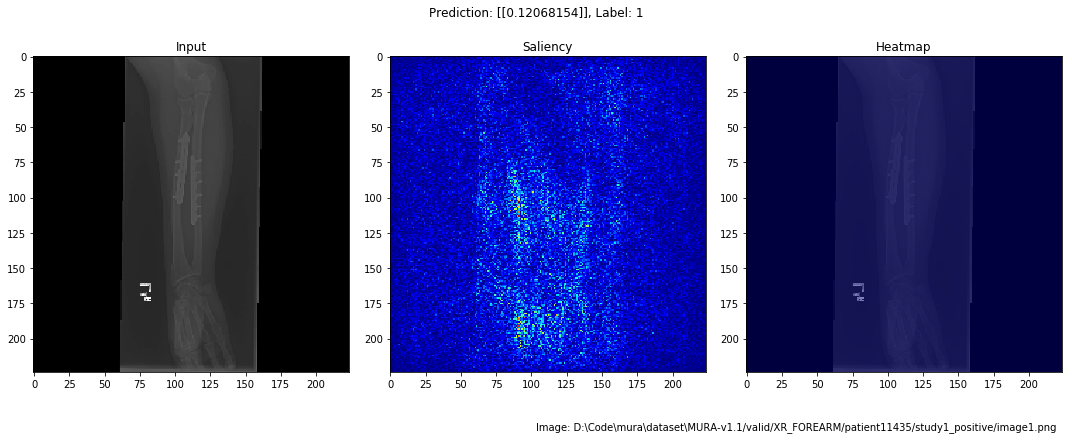

In [8]:
for _ in range(10):
    visualize.plt_attention(model_path, bpart=bpart, grayscale=grayscale)

#### Activation

In [9]:
visualize.plt_activation(model_path, layer_idx=-1, max_iter=2000)

KeyboardInterrupt: 

In [ ]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 15*96)

In [ ]:
visualize.plt_activation(model_path, layer_idx=-6)